In [1]:
import numpy as np
import pandas as pd 
import random,os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import LearningRateScheduler

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
TRAIN_PATH = "../input/digit-recognizer/train.csv"
TEST_PATH = "../input/digit-recognizer/test.csv"
SAMPLE_SUBMISSION_PATH = "../input/digit-recognizer/sample_submission.csv"
SUBMISSION_PATH = "submission.csv"

In [3]:
train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)
display(train.head())
display(test.head())
xtrain = train.values[:, 1:]
ytrain = train["label"]
xtest = test.values[:, 0:]
print(f'xtrain shape is {xtrain.shape}')
print(f'ytrain shape is {ytrain.shape}')


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


xtrain shape is (42000, 784)
ytrain shape is (42000,)


In [4]:
Counter(train['label']) #distribution of labels

Counter({1: 4684,
         0: 4132,
         4: 4072,
         7: 4401,
         3: 4351,
         5: 3795,
         8: 4063,
         9: 4188,
         2: 4177,
         6: 4137})

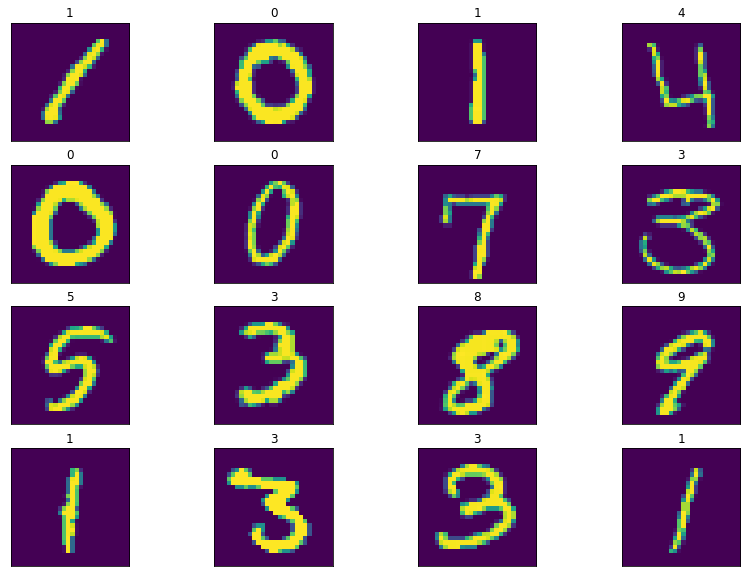

In [5]:
#plot the data content
fig = plt.figure(figsize=[14, 10])
for i in range(16):
    ax = fig.add_subplot(4 , 4, i + 1, xticks=[], yticks=[])
    ax.imshow(xtrain[i].reshape((28,28)))
    ax.set_title(str(ytrain[i]))



In [6]:
#data scaling 
xtrain = xtrain.astype('float32') / 255
xtest = xtest.astype('float32') / 255

# data reshaping
xtrain = xtrain.reshape(-1,28,28,1)
xtest = xtest.reshape(-1,28,28,1)

In [7]:
#convert multiclasses to binary
num_classes = 10
ytrain = to_categorical(ytrain,num_classes)


In [8]:
#get validation set
xtrain, xval = xtrain[:37000], xtrain[37000:]
ytrain, yval = ytrain[:37000], ytrain[37000:]
print(f'xtrain shape is {xtrain.shape}')
print(f'ytrain shape is {ytrain.shape}')
print(f'xval shape is {xval.shape}')
print(f'yval shape is {yval.shape}')
print(f'xtest shape is {xtest.shape}')

xtrain shape is (37000, 28, 28, 1)
ytrain shape is (37000, 10)
xval shape is (5000, 28, 28, 1)
yval shape is (5000, 10)
xtest shape is (28000, 28, 28, 1)


In [11]:
#model building
model = Sequential()
model.add(Conv2D(32, kernel_size = 2, padding='same', activation='relu', input_shape = (28, 28, 1)))
model.add(Conv2D(64, kernel_size = 2,padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), 2))
model.add(Conv2D(128, kernel_size = 3, padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size = 3, padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), 2))
model.add(Conv2D(512, kernel_size = 3,padding='same', activation='relu'))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
#network training
lr = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
epochs = 20
batch_size = 64
hist = model.fit(xtrain,ytrain,batch_size,
    epochs = epochs,
        steps_per_epoch=xtrain.shape[0] // batch_size,
        validation_data = (xval, yval),
        callbacks = [lr],
        verbose = 1)

print(f'CNN: Epochs = {epochs}, Training accuracy = {max(hist.history["accuracy"])}, Val accuracy = {max(hist.history["val_accuracy"])}')
print()

2022-05-09 18:37:10.430812: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
578/578 [==============================] - 305s 526ms/step - loss: 0.1455 - accuracy: 0.9550 - val_loss: 0.0512 - val_accuracy: 0.9832
Epoch 2/20
578/578 [==============================] - 304s 527ms/step - loss: 0.0458 - accuracy: 0.9862 - val_loss: 0.0327 - val_accuracy: 0.9906
Epoch 3/20
578/578 [==============================] - 306s 530ms/step - loss: 0.0310 - accuracy: 0.9905 - val_loss: 0.0315 - val_accuracy: 0.9914
Epoch 4/20
578/578 [==============================] - 306s 529ms/step - loss: 0.0221 - accuracy: 0.9935 - val_loss: 0.0379 - val_accuracy: 0.9900
Epoch 5/20
578/578 [==============================] - 306s 529ms/step - loss: 0.0155 - accuracy: 0.9953 - val_loss: 0.0296 - val_accuracy: 0.9922
Epoch 6/20
578/578 [==============================] - 307s 530ms/step - loss: 0.0149 - accuracy: 0.9951 - val_loss: 0.0347 - val_accuracy: 0.9904
Epoch 7/20
578/578 [==============================] - 304s 525ms/step - loss: 0.0099 - accuracy: 0.9965 - val_loss: 0.0356 -

In [23]:
results = np.zeros((xtest.shape[0], 10))
results += model.predict(xtest)


In [25]:
print(results.shape)
results = np.argmax(results, axis=1)

(28000, 10)


In [26]:
results = pd.Series(results, name="Label")

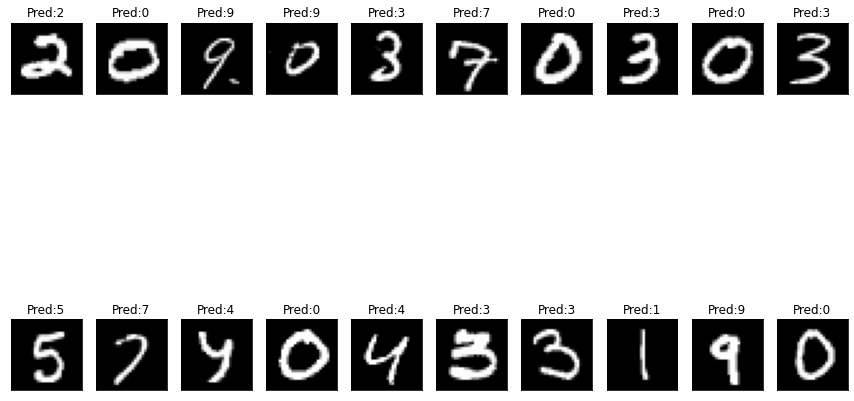

In [27]:
fig = plt.figure(figsize=[15, 10])


for i in range(20):
    img = xtest[i];
    ax = fig.add_subplot(2, 10, i+1)
    ax.grid(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.title.set_text(f'Pred:{results[i]}')
    plt.imshow(img, cmap='gray')
    
plt.show()